In [6]:
import pandas as pd 
df = pd.read_csv('data/churn.csv')

In [ ]:
# df[df['last_trip_date'] > '2014-06-01']

In [ ]:
df[df['phone'].isnull()] = 'other'

In [ ]:
df_dropped_na = df.dropna()

In [ ]:
df_classified = df_dropped_na.drop("trips_in_first_30_days",axis=1)

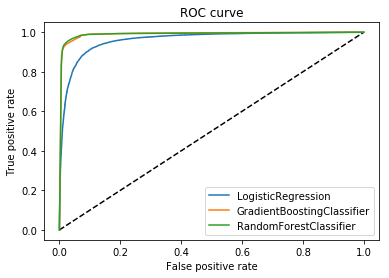

In [8]:
%matplotlib inline 
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from modelSelect import ModelSelect
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

n_estimator = 10

lm = LogisticRegression()
grd = GradientBoostingClassifier(n_estimators=n_estimator)
rf1 = RandomForestClassifier(n_estimators=n_estimator) 


model_list = [lm, grd, rf1]

fprs = []
tprs = []
for model in model_list:
    model = ModelSelect(model,model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    fig = plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for (fpr,tpr,model) in zip(fprs,tprs,model_list):
    plt.plot(fpr, tpr, label='{}'.format(model.__class__.__name__))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [11]:
for model in model_list:
    model = ModelSelect(model,model.__class__.__name__)


In [ ]:
model.

In [10]:
for model in model_list:
    model.fit(X_train, y_train)
    print model.cross_val(X_train, y_train)
    
    y_pred = model.predict_proba(X_test)[:,1]
    

AttributeError: 'LogisticRegression' object has no attribute 'cross_val'